In [49]:
import pandas as pd
import numpy  as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

In [9]:
data=pd.read_csv('../data/processed/monthly.csv')
data.head()

,Order Date,Sales,month,quarter,year,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3
0,2015-01-31,14205.707,1,1,2015,NaN,NaN,NaN,NaN,NaN
1,2015-02-28,4519.892,2,1,2015,14205.707,NaN,NaN,NaN,NaN
2,2015-03-31,55205.797,3,1,2015,4519.892,14205.707,NaN,24643.798667,26906.886844
3,2015-04-30,27906.855,4,2,2015,55205.797,4519.892,14205.707,29210.848000,25368.100830
4,2015-05-31,23644.303,5,2,2015,27906.855,55205.797,4519.892,35585.651667,17124.687284


In [11]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data=data.sort_values('Order Date')
data.head()

,Order Date,Sales,month,quarter,year,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3
0,2015-01-31,14205.707,1,1,2015,NaN,NaN,NaN,NaN,NaN
1,2015-02-28,4519.892,2,1,2015,14205.707,NaN,NaN,NaN,NaN
2,2015-03-31,55205.797,3,1,2015,4519.892,14205.707,NaN,24643.798667,26906.886844
3,2015-04-30,27906.855,4,2,2015,55205.797,4519.892,14205.707,29210.848000,25368.100830
4,2015-05-31,23644.303,5,2,2015,27906.855,55205.797,4519.892,35585.651667,17124.687284


In [17]:
data=data.dropna().reset_index(drop=True)

In [18]:
#since this one is a date time data we can use random split So i am customizing the training set

In [19]:
train_size=int(len(data)*0.8)
train=data.iloc[:train_size]
test=data.iloc[train_size:]

In [20]:
x_train=train.drop(columns=['Sales','Order Date'])
y_train=train['Sales']
x_test=test.drop(columns=['Sales','Order Date'])
y_test=test['Sales']

In [22]:
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)

In [24]:
linear_mae=mean_absolute_error(y_test,y_pred)
linear_mse=mean_squared_error(y_test,y_pred)
linear_rmse=np.sqrt(linear_mse)

In [29]:
print('Mean Absolute Error of Linear Regression:', linear_mae)
print('Mean Squared Error of Linear Regression:', linear_mse)
print('Root Mean Squared Error of Linear Regression:', linear_rmse)

Mean Absolute Error of Linear Regression: 1.778567416800393e-11
Mean Squared Error of Linear Regression: 7.293894823578698e-22
Root Mean Squared Error of Linear Regression: 2.7007211673141486e-11


In [30]:
forest=RandomForestRegressor(n_estimators=200,random_state=42)
forest.fit(x_train,y_train)
forest_pred=forest.predict(x_test)

In [31]:
forest_mae=mean_absolute_error(y_test,forest_pred)
forest_mse=mean_squared_error(y_test,forest_pred)
forest_rmse=np.sqrt(forest_mse)

In [32]:
print('Mean Absolute Error of Random forest:', forest_mae)
print('Mean Squared Error of Random forest:', forest_mse)
print('Root Mean Squared Error of Random forest:', forest_rmse)

Mean Absolute Error of Random forest: 11847.998920666743
Mean Squared Error of Random forest: 257426473.34295356
Root Mean Squared Error of Random forest: 16044.515366409592


In [35]:
result=pd.DataFrame({
    "Model":["Linear Regression","Random Forest"],
    "MAE":[linear_mae,forest_mae],
    "MSE":[linear_mse,forest_mse],
    "RMSE":[linear_rmse,forest_rmse]
})

In [39]:
print("The Results are:\n")
print(result)

The Results are:

               Model           MAE           MSE          RMSE
0  Linear Regression  1.778567e-11  7.293895e-22  2.700721e-11
1      Random Forest  1.184800e+04  2.574265e+08  1.604452e+04


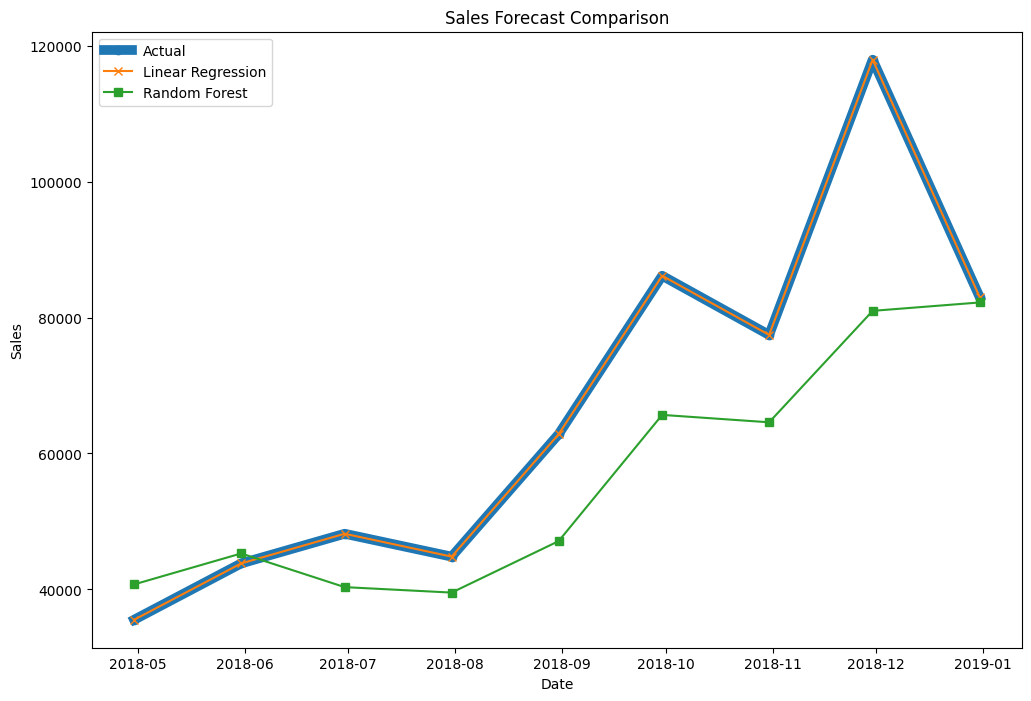

In [47]:
plt.figure(figsize=(12,8))
plt.plot(test['Order Date'],y_test.values,label="Actual",marker='o',linewidth=7)
plt.plot(test['Order Date'], y_pred, label="Linear Regression", marker='x')
plt.plot(test['Order Date'], forest_pred, label="Random Forest", marker='s')
plt.title("Sales Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [48]:
if linear_rmse < forest_rmse:
    best_model = "Random Forest"
else:
    best_model = "Linear Regression"

print(f"Best model based on RMSE: {best_model}")

Best model based on RMSE: Random Forest


In [50]:
joblib.dump(forest,'../models/sales_forecast.pkl')
print('Success')

Success


In [52]:
feature_cols=x_train.columns.tolist()

In [53]:
joblib.dump(feature_cols,'../models/feature_cols.pkl')
print("Success")

Success
